In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('fivethirtyeight')
from sklearn.metrics import accuracy_score


In [3]:
iris=pd.read_csv('Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
X = iris.iloc[:,1:5].values  # X is a matrix
y=iris.iloc[:,-1].values

y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [9]:
# Lable Encoding the categorical data (dependent(y))
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
print(y)
# Test Train Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

classifier_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
classifier_gini.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_pred_gini = classifier_gini.predict(X_test)


In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm ,'\n')
prediction = accuracy_score(y_test, y_pred)
print(prediction * 100)


[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]] 

97.36842105263158


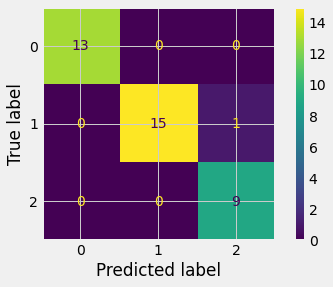

In [9]:
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show() 

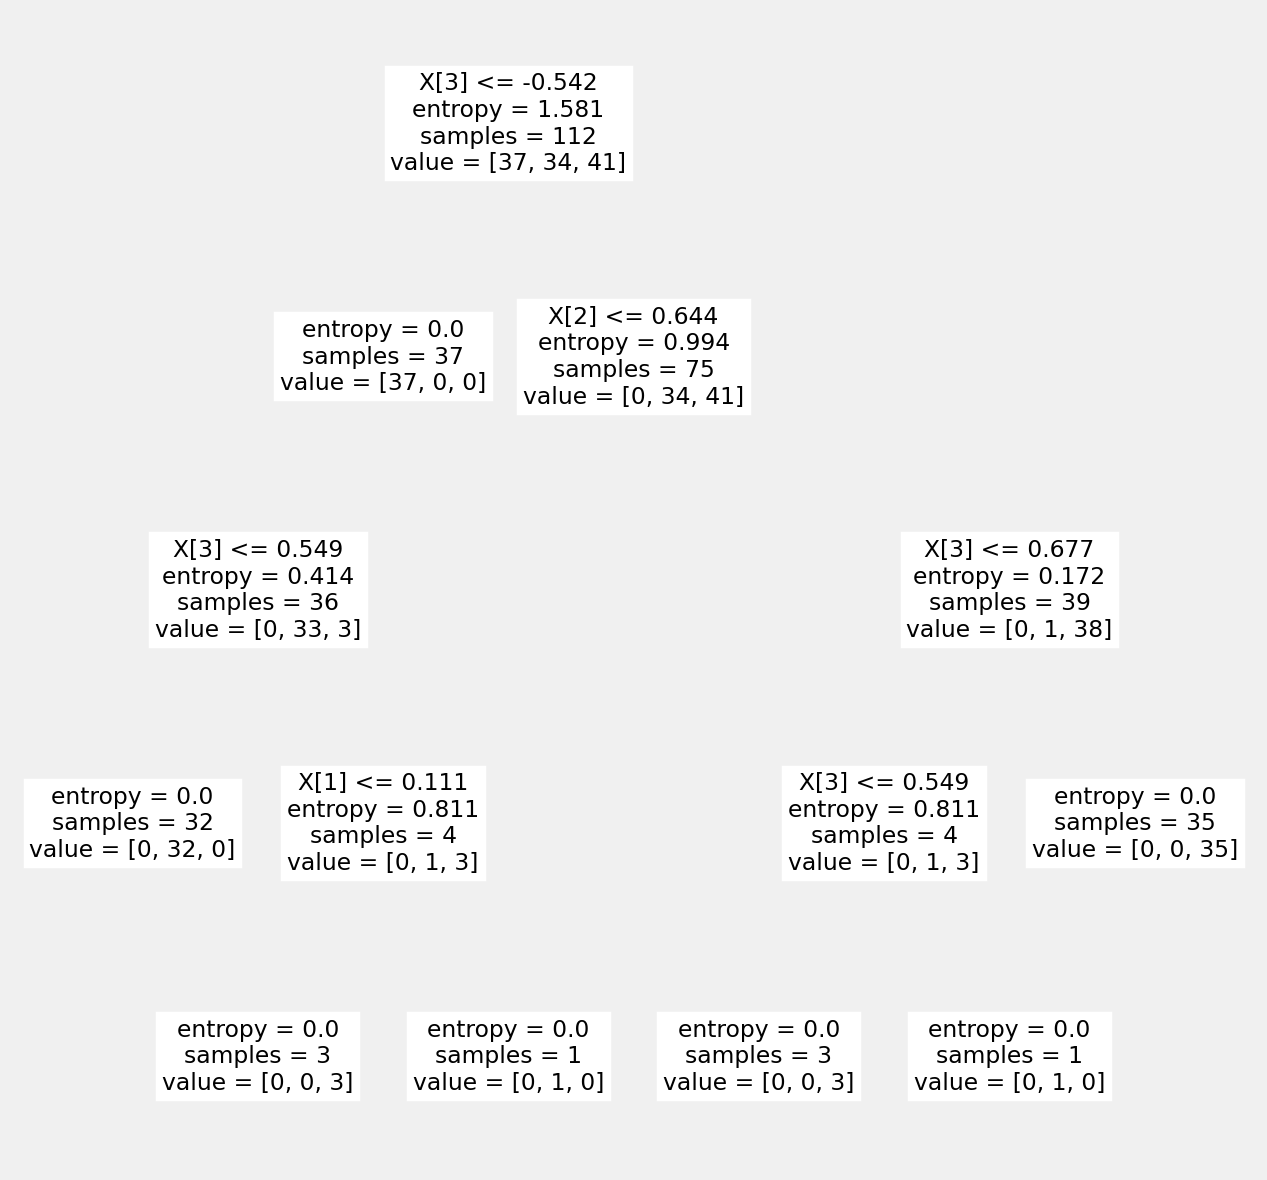

In [10]:
from sklearn import tree
plt.figure(figsize = (20, 20))
tree.plot_tree(classifier);

## Naive bayes Classifier 

In [11]:
X = iris.iloc[:,1:5].values  # X is a matrix
y=iris.iloc[:,-1].values

In [12]:
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder # ENCODING CATEGORICAL DATA
Y=labelencoder_Y=LabelEncoder()

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)


In [13]:
# feature scaling                      
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

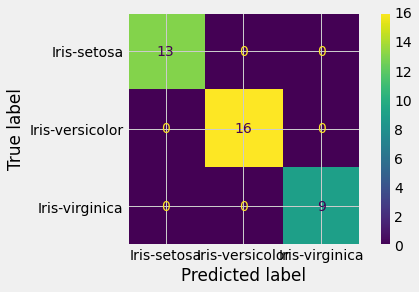

In [15]:
from sklearn.naive_bayes import GaussianNB
classifiergb = GaussianNB()
classifiergb.fit(X_train,y_train)
y_prednb = classifiergb.predict(X_test)


plot_confusion_matrix(classifiergb, X_test, y_test)  
plt.show() 

In [16]:
accuracynaive=accuracy_score(y_test, y_prednb)
print (accuracynaive*100)

100.0


## Logistic Regression classifier

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = iris.iloc[:,1:5].values  # X is a matrix
y=iris.iloc[:,-1].values



In [19]:
# feature scaling                      
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  # when you are going to learn only then you will use fit 
X_test = sc.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression
classifierlr = LogisticRegression(random_state=0)
classifierlr.fit(X_train,y_train)
y_predlr = classifierlr.predict(X_test)


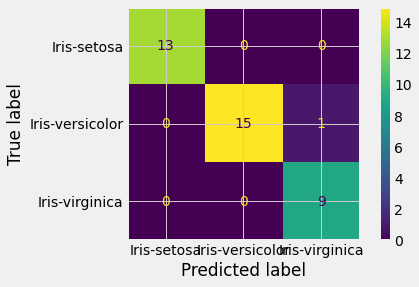

In [22]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifierlr, X_test, y_test) 
plt.show()

In [23]:
accuracylr=accuracy_score(y_test, y_predlr)
accuracylr*100

97.36842105263158

## K-NN classifier

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
X = iris.iloc[:,1:5].values  # X is a matrix
y=iris.iloc[:,-1].values

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [27]:
# feature scaling                      
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  # when you are going to learn only then you will use fit 
X_test = sc.transform(X_test)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
classifierknn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p=2) # p = 2 means euclidian distance p=1 is manhaton distance
classifierknn.fit(X_train,y_train)

KNeighborsClassifier()

In [29]:
y_predknn = classifierknn.predict(X_test)
y_predknn


array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

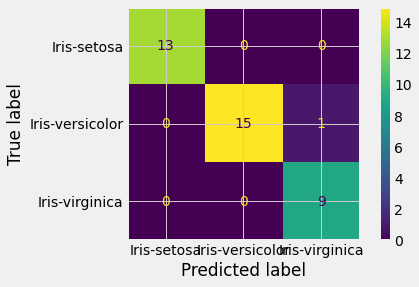

In [30]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifierknn, X_test, y_test) 
plt.show()

In [31]:
accuracyKNN=accuracy_score(y_test, y_predknn)
accuracyKNN*100

97.36842105263158

### Logistic Regression model and apply PAC

Our KNN model gave ~97.66% accuracy with approx error rate ~0.14,

m >= [1/e(ln(|H|) + ln(1/delta))]

|H| = 761530 (54150)

delta = 0.02

e <= 0.14

In [32]:
import math

m = (math.log(761530, 2.718) + math.log(1/0.02, 2.718)) / 0.14
print('The number of samples required  : ', m )

The number of samples required  :  124.69227042644012


## Random Forest Model

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
X = iris.iloc[:,1:5].values  # X is a matrix
y=iris.iloc[:,-1].values

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [37]:
# feature scaling                      
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [38]:
from sklearn.ensemble import RandomForestClassifier

regressor1 = RandomForestClassifier(n_estimators=150, random_state=0)
regressor1.fit(X_train, y_train)
y_predrandom = regressor1.predict(X_test)

In [39]:
y_predrandom = regressor1.predict(X_test)

In [40]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(y_test,y_predrandom)
cm4

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

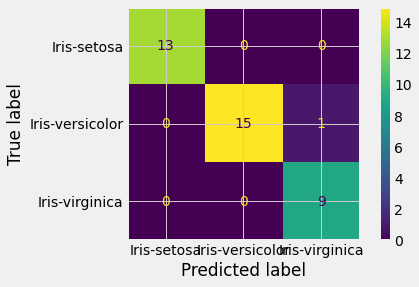

In [41]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(regressor1, X_test, y_test) 
plt.show()

In [42]:
accuracyrandomforest=accuracy_score(y_test, y_predrandom)
accuracyrandomforest*100

97.36842105263158

## Ada Boost Model

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
X = iris.iloc[:,1:5].values  # X is a matrix
y=iris.iloc[:,-1].values

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

# feature scaling                      
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  # when you are going to learn only then you will use fit 
X_test = sc.transform(X_test)

In [46]:
from sklearn.ensemble import AdaBoostClassifier
cl = AdaBoostClassifier(base_estimator = classifierlr, 
                        n_estimators = 150,
                        random_state = 0)
cl.fit(X_train, y_train)
y_predlr = cl.predict(X_test)
cm2 = confusion_matrix(y_test, y_predlr)
print(cm2 ,'\n')
prediction_lb = accuracy_score(y_test, y_predlr)
print('Accuracy  for adaboost by logistic regression is :', prediction_lb * 100)

[[13  0  0]
 [ 0 16  0]
 [ 0  3  6]] 

Accuracy  for adaboost by logistic regression is : 92.10526315789474


In [ ]:
cl = AdaBoostClassifier(base_estimator = classifiergb, 
                        n_estimators = 1,
                        random_state = 0)
cl.fit(X_train, y_train)
y_prednb = cl.predict(X_test)
cm_AB = confusion_matrix(y_test, y_prednb)
print(cm_AB ,'\n')
prediction_AB = accuracy_score(y_test, y_prednb)
print('Accuracy is :', prediction_AB * 100)

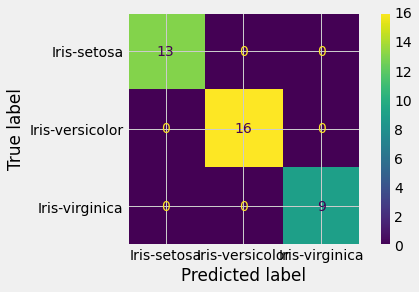

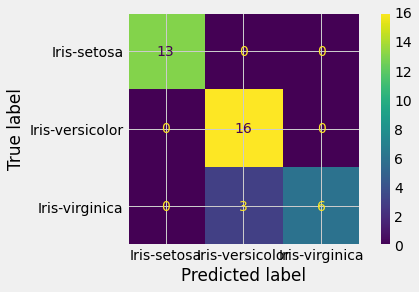

In [47]:
plot_confusion_matrix(classifiergb, X_test, y_test) 
plot_confusion_matrix(cl, X_test, y_test)
plt.show() 

# Comparision

In [48]:
import pandas as pd
l1 = ['DecisionTree (entropy and gini)', 'Naive Bayes', 'Logistic Regression', 'K-Nearest Neighbor', 'Finding "m" values using PAC', 'RandomForest', 'AdaBoost']
l2 = [97.3684, 100, 97.3684, 97.3684, 124, 97.3684, 100]

table = pd.DataFrame(list(zip(l1,l2)), columns = ['Classifier Model', 'Accuracy in Percentage'])
table

,Classifier Model,Accuracy in Percentage
0,DecisionTree (entropy and gini),97.3684
1,Naive Bayes,100.0000
2,Logistic Regression,97.3684
3,K-Nearest Neighbor,97.3684
4,"Finding ""m"" values using PAC",124.0000
5,RandomForest,97.3684
6,AdaBoost,100.0000


In [ ]:
"""reffering from above comparision table we can conclude that our accuracy increase when we are using adaboost."""

## Part-2:

Develop a linear regression using house price prediction dataset from UCI repository

In [49]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
# Importing the Boston Housing dataset
from sklearn.datasets import load_boston
boston = load_boston()

# Initializing the dataframe
data = pd.DataFrame(boston.data)
# See head of the dataset
data.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [51]:
#Adding the feature names to the dataframe
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [52]:
#Adding target variable to dataframe
data['PRICE'] = boston.target 
# Median value of owner-occupied homes in $1000s

In [53]:
#Check the shape of dataframe
data.shape

(506, 14)

In [54]:
# Check for missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [55]:
# Viewing the data statistics
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [56]:
#create matrix of all independent variable

X = data.iloc[:,:-1].values
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [57]:
#create a matrix  of dependent variable

y = data.iloc[:,-1].values
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [61]:
#splitting the dataste into train set and test test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [62]:
#Fitting simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [63]:
#predicting the test set results
y_pred = regressor.predict(X_test)

In [64]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_pred)
print('R^2:', acc_linreg)

R^2: 0.6733825506400193


Text(0.5, 1.0, 'Actual Prices vs Predicted prices')

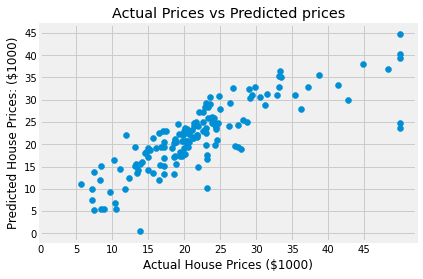

In [65]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted House Prices: ($1000)")
plt.xticks(range(0, int(max(y_test)),5))
plt.yticks(range(0, int(max(y_test)),5))
plt.title("Actual Prices vs Predicted prices")

## 
Part-3: using Numeric, Pandas and other Python libraries

Write the Python code to compute entropy and information gain
Write the Python code to demonstrate conditional probability
Write the Python code to compute Euclidean Distance between data points
Write the Python code to calculate covariance matrix, Eigen values and Eigen vectors
Write the Python code to calculate the following Accuracy e Misclassification Type-1 and Type-2 error rates Sensitivity Specificity
Write the Python code to compute entropy and information gain

In [67]:
#import the required Libraries
import numpy as np
import pandas as pd
eps = np.finfo(float).eps
from numpy import log2 as log

In [68]:
#define the dataset
outlook = 'overcast,overcast,overcast,overcast,rainy,rainy,rainy,rainy,rainy,sunny,sunny,sunny,sunny,sunny'.split(',')
temp = 'hot,cool,mild,hot,mild,cool,cool,mild,mild,hot,hot,mild,cool,mild'.split(',')
humidity = 'high,normal,high,normal,high,normal,normal,normal,high,high,high,high,normal,normal'.split(',')
windy = 'FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE'.split(',')
play = 'yes,yes,yes,yes,yes,yes,no,yes,no,no,no,no,yes,yes'.split(',')

In [69]:
dataset ={'outlook':outlook,'temp':temp,'humidity':humidity,'windy':windy,'play':play}
df = pd.DataFrame(dataset,columns=['outlook','temp','humidity','windy','play'])
df

,outlook,temp,humidity,windy,play
0,overcast,hot,high,FALSE,yes
1,overcast,cool,normal,TRUE,yes
2,overcast,mild,high,TRUE,yes
3,overcast,hot,normal,FALSE,yes
4,rainy,mild,high,FALSE,yes
5,rainy,cool,normal,FALSE,yes
6,rainy,cool,normal,TRUE,no
7,rainy,mild,normal,FALSE,yes
8,rainy,mild,high,TRUE,no
9,sunny,hot,high,FALSE,no


In [70]:
# step1 : calculate entropy of the whole dataset
entropy_node = 0  #Initialize Entropy
values = df.play.unique()  #Unique objects - 'Yes', 'No'
for value in values:
    fraction = df.play.value_counts()[value]/len(df.play)  
    entropy_node += -fraction*np.log2(fraction)
print(entropy_node)

0.9402859586706311


In [72]:
# step2: define a function {ent} to calculate entropy of each attribute
def ent(df,attribute):
    target_variables = df.play.unique()  #This gives all 'Yes' and 'No'
    variables = df[attribute].unique()    #This gives different features in that attribute (like 'outlook')


    entropy_attribute = 0
    for variable in variables:
        entropy_each_feature = 0
        for target_variable in target_variables:
            num = len(df[attribute][df[attribute]==variable][df.play ==target_variable]) #numerator
            den = len(df[attribute][df[attribute]==variable])  #denominator
            fraction = num/(den+eps)  #pi
            entropy_each_feature += -fraction*log(fraction+eps) #This calculates entropy for one feature like 'outlook'
        fraction2 = den/len(df)
        entropy_attribute += -fraction2*entropy_each_feature   #Sums up all the entropy 

    return(abs(entropy_attribute))

In [73]:
#store entropy of each attribute with its name :
a_entropy = {k:ent(df,k) for k in df.keys()[:-1]}
a_entropy

{'outlook': 0.6935361388961914,
 'temp': 0.9110633930116756,
 'humidity': 0.7884504573082889,
 'windy': 0.892158928262361}

In [74]:
#step3 : calculate Info gain of each attribute
#IG(attr) = entropy of dataset - entropy of attribute
def ig(e_dataset,e_attr):
    return(e_dataset-e_attr)
#store IG of each attr in a dict :
#entropy_node = entropy of dataset
#a_entropy[k] = entropy of k(th) attr
IG = {k:ig(entropy_node,a_entropy[k]) for k in a_entropy}
IG

{'outlook': 0.24674981977443977,
 'temp': 0.029222565658955535,
 'humidity': 0.15183550136234225,
 'windy': 0.048127030408270155}

outlook has the highest info gain of 0.24 , therefore we will select outook as the root node.

In [ ]:
2. Write the Python code to demonstrate conditional probability

In [75]:
from itertools import product #to get cartesian product
#example 
list(product([1,2],['a','b','c']))

[(1, 'a'), (1, 'b'), (1, 'c'), (2, 'a'), (2, 'b'), (2, 'c')]

In [76]:
n = 3 # number of coin tossings
samplespace = set(product(['H','T'],repeat=n))
samplespace

{('H', 'H', 'H'),
 ('H', 'H', 'T'),
 ('H', 'T', 'H'),
 ('H', 'T', 'T'),
 ('T', 'H', 'H'),
 ('T', 'H', 'T'),
 ('T', 'T', 'H'),
 ('T', 'T', 'T')}

In [77]:
len(samplespace) # No of outcomes in sample space

8

In [78]:
A = { x for x in samplespace if x[0] == 'T'} #Event A =>first toss is tail
A

{('T', 'H', 'H'), ('T', 'H', 'T'), ('T', 'T', 'H'), ('T', 'T', 'T')}

In [79]:
B = { x for x in samplespace if x.count('T')==2} #Event B ==>getting extactly 2 tails
B

{('H', 'T', 'T'), ('T', 'H', 'T'), ('T', 'T', 'H')}

In [80]:
def prob(X):
  return len(X) / len(samplespace)

In [81]:
def cond_prob(X,Y):
  return len(X & Y) / len(Y)

In [82]:
prob(A)

0.5

In [83]:
prob(B)

0.375

In [84]:
cond_prob(A,B)

0.6666666666666666

3. Write the Python code to compute Euclidean Distance between data points

In [85]:
import numpy as np 
  
# intializing points in 
# numpy arrays 
point1 = np.array([4, 5]) 
point2 = np.array([2, 2]) 
  
# calculating Euclidean distance 
# using linalg.norm() 
dist = np.linalg.norm(point1 - point2) 
  
# printing Euclidean distance 
print(dist) 

3.605551275463989


4. Write the Python code to calculate covariance matrix, Eigen values and Eigen vectors

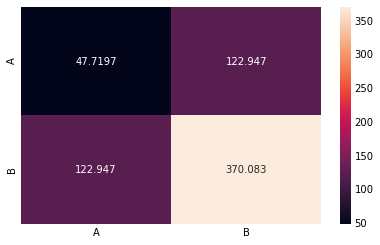

In [86]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'A': [9,15,25,14,10,18,0,16,5,19,16,20],
        'B': [39,56,93,61,50,75,32,85,42,70,66,80]    
        }

df = pd.DataFrame(data,columns=['A','B'])

covMatrix = pd.DataFrame.cov(df)
sn.heatmap(covMatrix, annot=True, fmt='g')
plt.show()

In [87]:
# importing numpy library 
import numpy as np 
  
# create a covariance matix array
c = covMatrix.values
  
print("Printing the covariance matrix:\n", 
      c) 
  
# finding eigenvalues and eigenvectors 
eval, evec = np.linalg.eig(c) 
  
# printing eigen values 
print("Printing the Eigen values of the given covariance matric:\n", eval) 
  
# printing eigen vectors 
print("Printing Right eigenvectors of the given covariance matrix:\n",evec)

Printing the covariance matrix:
 [[ 47.71969697 122.9469697 ]
 [122.9469697  370.08333333]]
Printing the Eigen values of the given covariance matric:
 [  6.18117609 411.62185422]
Printing Right eigenvectors of the given covariance matrix:
 [[-0.94738969 -0.32008244]
 [ 0.32008244 -0.94738969]]


5. Write the Python code to calculate the following Accuracy e Misclassification Type-1 and Type-2 error rates Sensitivity Specificity

In [88]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
ytest = [1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0 ,0, 1, 1, 0, 0, 0]
ypred = [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
cm= metrics.confusion_matrix(ytest, ypred)
print(cm)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

[[15  1]
 [ 7  2]]


In [89]:
#Accuracy (all correct / all) = TP + TN / TP + TN + FP + FN
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(ytest, ypred))

0.68
0.68


In [90]:
#Misclassification (all incorrect / all) = FP + FN / TP + TN + FP + FN
misclassification = (FP + FN) / float(TP + TN + FP + FN)

print(misclassification)
print(1 - metrics.accuracy_score(ytest, ypred))

0.32
0.31999999999999995


In [91]:
#type 1 error rate = FP/FP+TN
type1error_rate = FP / float(FP + TN)
type1error_rate

0.0625

In [92]:
#type 2 error rate = FN/FN+TP
type2error_rate = FN / float(FN + TP)
type2error_rate

0.7777777777777778

In [93]:
#Sensitivity aka Recall (true positives / all actual positives) = TP / TP + FN
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(ytest, ypred))

0.2222222222222222
0.2222222222222222


In [94]:
#Specificity (true negatives / all actual negatives) =TN / TN + FP
specificity = TN / (TN + FP)

print(specificity)

0.9375
